<a href="https://colab.research.google.com/github/brayla-oya/DDDS-My-Projects/blob/main/Capstone_EVstations_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EV Charging v2

## Problem Definition


This notebook analyzes the charging locations in the state of NM. We will only look at Albuquerque DC Fast chargers for this. It will later be joined with ABQ EV registration and ABQ businesses.

### Business Problem


*   Identifying charging locations and planning an optimal site for a new station.

### Data Science Problem


*   Clean and transform data into a new dataframe with relevant information.
*   Mapping total number of DC Fast Chargers (2014-2025)
*   Creating a color map to locate charging deserts









## Data Collection/Sources


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning


In [3]:
url = "https://developer.nrel.gov/api/alt-fuel-stations/v1.csv?access=all&api_key=BTjBgth23foa0fxXRfHBSe0nMZCxRdXYzCHGhOYi&country=US&download=true&fuel_type=ELEC&state=NM&status=all"

In [4]:
ev_data = pd.read_csv(url)
pd.set_option('display.max_columns', None)  # Show all columns
ev_data

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Inn at Santa Fe,8376 Cerrillos Rd,NaN,Santa Fe,NM,87507,NaN,505-474-9500,E,NaN,Public,24 hours daily; hotel customers only; Drivers ...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Non-Networked,NaN,GPS,35.612290,-106.032300,2022-08-10,46893,2024-12-23 16:52:59 UTC,P,NaN,NaN,2012-05-12,NaN,NaN,NaN,NaN,NEMA520,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,INN,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,ELEC,City of Santa Fe - Railyard Parking Garage,503 Camino de la Familia,2nd and 3rd space to the left as you drive in,Santa Fe,NM,87501,NaN,505-955-6581,E,NaN,Public,"Garage business hours; PayPal, Google Pay",APPLE_PAY CREDIT Debit,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,GPS,35.684510,-105.948000,2025-01-13,48864,2025-02-12 00:16:32 UTC,LG,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49915,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,CHADEMO J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49916,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [5]:
ev_data.shape

(438, 75)

In [6]:
ev_data.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Inn at Santa Fe,8376 Cerrillos Rd,NaN,Santa Fe,NM,87507,NaN,505-474-9500,E,NaN,Public,24 hours daily; hotel customers only; Drivers ...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Non-Networked,NaN,GPS,35.612290,-106.032300,2022-08-10,46893,2024-12-23 16:52:59 UTC,P,NaN,NaN,2012-05-12,NaN,NaN,NaN,NaN,NEMA520,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,INN,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,ELEC,City of Santa Fe - Railyard Parking Garage,503 Camino de la Familia,2nd and 3rd space to the left as you drive in,Santa Fe,NM,87501,NaN,505-955-6581,E,NaN,Public,"Garage business hours; PayPal, Google Pay",APPLE_PAY CREDIT Debit,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,GPS,35.684510,-105.948000,2025-01-13,48864,2025-02-12 00:16:32 UTC,LG,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49915,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,CHADEMO J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49916,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN


In [7]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 75 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Fuel Type Code                           438 non-null    object 
 1   Station Name                             438 non-null    object 
 2   Street Address                           438 non-null    object 
 3   Intersection Directions                  166 non-null    object 
 4   City                                     438 non-null    object 
 5   State                                    438 non-null    object 
 6   ZIP                                      438 non-null    int64  
 7   Plus4                                    0 non-null      float64
 8   Station Phone                            425 non-null    object 
 9   Status Code                              438 non-null    object 
 10  Expected Date                            19 non-nu

In [8]:
ev_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ZIP,438.0,87515.577626,412.912652,87004.000000,87111.000000,87505.000000,87923.500000,88435.000000
Plus4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BD Blends,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NG Fill Type Code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NG PSI,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EV Level1 EVSE Num,3.0,3.000000,3.464102,1.000000,1.000000,1.000000,4.000000,7.000000
EV Level2 EVSE Num,289.0,2.058824,1.516117,1.000000,1.000000,2.000000,2.000000,20.000000
EV DC Fast Count,149.0,3.208054,2.936893,1.000000,1.000000,2.000000,4.000000,16.000000
EV Other Info,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,438.0,34.860472,1.285172,31.830388,34.947062,35.136633,35.662017,36.902166


In [9]:
# check for nulls
ev_data.isnull().sum()

,0
Fuel Type Code,0
Station Name,0
Street Address,0
Intersection Directions,272
City,0
...,...
CNG Station Sells Renewable Natural Gas,438
LNG Station Sells Renewable Natural Gas,438
Maximum Vehicle Class,385
EV Workplace Charging,0


In [10]:
null_ratios = ev_data.isnull().mean()
dropped_cols = null_ratios[null_ratios >= 0.3].index.tolist()
print("Dropped columns (≥ 30% nulls):", dropped_cols)

Dropped columns (≥ 30% nulls): ['Intersection Directions', 'Plus4', 'Expected Date', 'Cards Accepted', 'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name', 'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump', 'Intersection Directions (French)', 'Access Days Time (French)', 'BD Blends (French)', 'Hydrogen Is Retail', 'Access Detail Code', 'Federal Agency Code', 'Facility Type', 'CNG Dispenser Num', 'CNG On-Site Renewable Source', 'CNG Total Compression Capacity', 'CNG Storage Capacity', 'LNG On-Site Renewable Source', 'E85 Other Ethanol Blends', 'EV Pricing', 'EV Pricing (French)', 'LPG Nozzle Types', 'Hydrogen Pressures', 'Hydrogen Standards', 'CNG Fill Type Code', 'CNG PSI', 'CNG Vehicle Class', 'LNG Vehicle Class', 'EV On-Site Renewable Source', 'Restricted Access', 'RD Blends', 'RD Blends (French)', 'RD Blended with Biodiese

In [11]:
# convert dates
ev_data['Open Date'] = pd.to_datetime(ev_data['Open Date'], errors='coerce')

In [12]:
ev_clean = ev_data.copy()
ev_clean

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Inn at Santa Fe,8376 Cerrillos Rd,NaN,Santa Fe,NM,87507,NaN,505-474-9500,E,NaN,Public,24 hours daily; hotel customers only; Drivers ...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Non-Networked,NaN,GPS,35.612290,-106.032300,2022-08-10,46893,2024-12-23 16:52:59 UTC,P,NaN,NaN,2012-05-12,NaN,NaN,NaN,NaN,NEMA520,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,INN,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,ELEC,City of Santa Fe - Railyard Parking Garage,503 Camino de la Familia,2nd and 3rd space to the left as you drive in,Santa Fe,NM,87501,NaN,505-955-6581,E,NaN,Public,"Garage business hours; PayPal, Google Pay",APPLE_PAY CREDIT Debit,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,GPS,35.684510,-105.948000,2025-01-13,48864,2025-02-12 00:16:32 UTC,LG,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49915,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,CHADEMO J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49916,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [13]:
filter = ev_clean['City'] == 'Albuquerque'

In [14]:
ev_clean_ABQ = ev_clean[filter]

In [15]:
ev_clean[ev_clean['ZIP'] == 87106]

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
8,ELEC,UNM CORNELL 1,2401 Redondo S Dr,"Cornell Parking Structure, Level 4",Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,35.081831,-106.619140,2025-08-04,75367,2025-08-04 01:08:31 UTC,NaN,NaN,NaN,2016-04-23,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
9,ELEC,UNM YALE 1,1913 Las Lomas Rd NE,"Yale Parking Structure, Level 1",Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,35.087448,-106.621297,2025-08-04,75368,2025-08-04 01:08:31 UTC,NaN,NaN,NaN,2016-04-23,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
26,ELEC,Cutter Aviation Albuquerque - Tesla Destination,2502 Clark-Carr Loop SE,NaN,Albuquerque,NM,87106,NaN,877-798-3752,E,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Tesla Destination,https://www.tesla.com/destination-charging,200-8,35.038494,-106.618818,2024-07-01,114801,2025-02-12 00:16:32 UTC,P,NaN,NaN,2015-11-04,NaN,NaN,NaN,NaN,TESLA,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,AIRPORT,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
56,ELEC,CNM PARKING LOT UPPER SSC,940 University Blvd SE,"First 3hrs, it is $0.25 per kwH and after 3hrs...",Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,35.071878,-106.627366,2025-08-04,143247,2025-08-04 01:31:52 UTC,NaN,NaN,NaN,2019-08-15,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
74,ELEC,CNM PARKING LOT SB 2,Ash St SE,Near northwest corner of Marketplace building ...,Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,35.075032,-106.629411,2025-08-04,168145,2025-08-04 01:50:47 UTC,NaN,NaN,NaN,2020-11-05,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
93,ELEC,CNM PARKING LOT SB 1,Ash St SE,Near northwest corner of Marketplace building ...,Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN

In [16]:
# Now you can safely extract the year
ev_clean_ABQ['Open Year'] = ev_clean_ABQ['Open Date'].dt.year


/tmp/ipython-input-116225803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_clean_ABQ['Open Year'] = ev_clean_ABQ['Open Date'].dt.year


In [17]:
ev_zip_ABQ = ev_clean_ABQ[['ZIP', 'Status Code', 'Latitude', 'Longitude', 'EV Connector Types','EV DC Fast Count', 'Open Year']]
ev_zip_ABQ

,ZIP,Status Code,Latitude,Longitude,EV Connector Types,EV DC Fast Count,Open Year
4,87110,E,35.087920,-106.562060,J1772,NaN,2012.0
5,87110,E,35.087920,-106.562060,J1772,NaN,2012.0
6,87114,E,35.193238,-106.655819,J1772,NaN,2012.0
7,87114,E,35.193238,-106.655819,J1772,NaN,2012.0
8,87106,E,35.081831,-106.619140,J1772,NaN,2016.0
...,...,...,...,...,...,...,...
409,87111,E,35.134242,-106.522115,J1772,NaN,2025.0
410,87111,E,35.134280,-106.522044,J1772,NaN,2025.0
411,87111,E,35.134243,-106.522100,J1772,NaN,2025.0
431,87102,E,35.080159,-106.638761,J1772,NaN,2025.0


Drop rows that have NaN for 'EV DC Fast Count'. We only want a df with the Fast Count.

In [18]:
ev_zip_ABQ = ev_zip_ABQ.dropna(subset=['EV DC Fast Count'])
ev_zip_ABQ

,ZIP,Status Code,Latitude,Longitude,EV Connector Types,EV DC Fast Count,Open Year
17,87107,E,35.108486,-106.612804,TESLA,6.0,2015.0
54,87107,E,35.112740,-106.606260,CHADEMO J1772COMBO,10.0,2019.0
62,87116,E,35.052600,-106.533285,J1772 J1772COMBO,5.0,2020.0
108,87113,E,35.183643,-106.589520,J1772COMBO,1.0,2021.0
156,87110,E,35.104286,-106.565888,TESLA,16.0,2022.0
201,87110,E,35.096985,-106.564983,CHADEMO J1772COMBO,2.0,2023.0
222,87109,E,35.171800,-106.586601,TESLA,8.0,2023.0
241,87106,E,35.075580,-106.621750,J1772COMBO,6.0,2023.0
251,87114,E,35.188294,-106.661535,CHADEMO J1772COMBO,1.0,2024.0
252,87114,E,35.188312,-106.661583,J1772COMBO TESLA,1.0,2024.0


In [19]:
ev_zip_ABQ.isnull().sum()

,0
ZIP,0
Status Code,0
Latitude,0
Longitude,0
EV Connector Types,0
EV DC Fast Count,0
Open Year,0


In [20]:
ev_zip_ABQ.shape

(25, 7)

Out of the 150 charger locations in ABQ, there are only 25 fast charger locations.

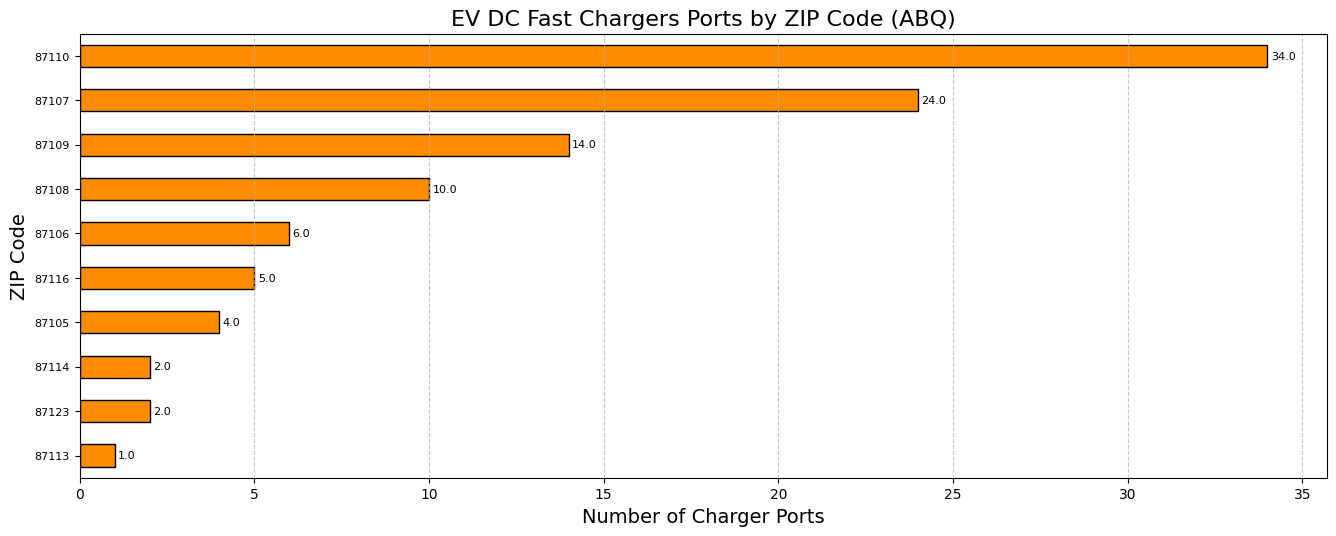

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by ZIP code and sum the DC fast chargers
fast_charger_counts = ev_zip_ABQ.groupby('ZIP')['EV DC Fast Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, max(6, len(fast_charger_counts) * 0.15)))
ax = fast_charger_counts.plot(kind='barh', color='darkorange', edgecolor='black')

plt.title('EV DC Fast Chargers Ports by ZIP Code (ABQ)', fontsize=16)
plt.xlabel('Number of Charger Ports', fontsize=14)
plt.ylabel('ZIP Code', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3)
# This line inverts the y-axis so the highest value is at the top
plt.gca().invert_yaxis()

# Add count labels on bars
for i, v in enumerate(fast_charger_counts):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=8)

plt.savefig('dc_fast_chargers_by_zip_bar_chart.png')


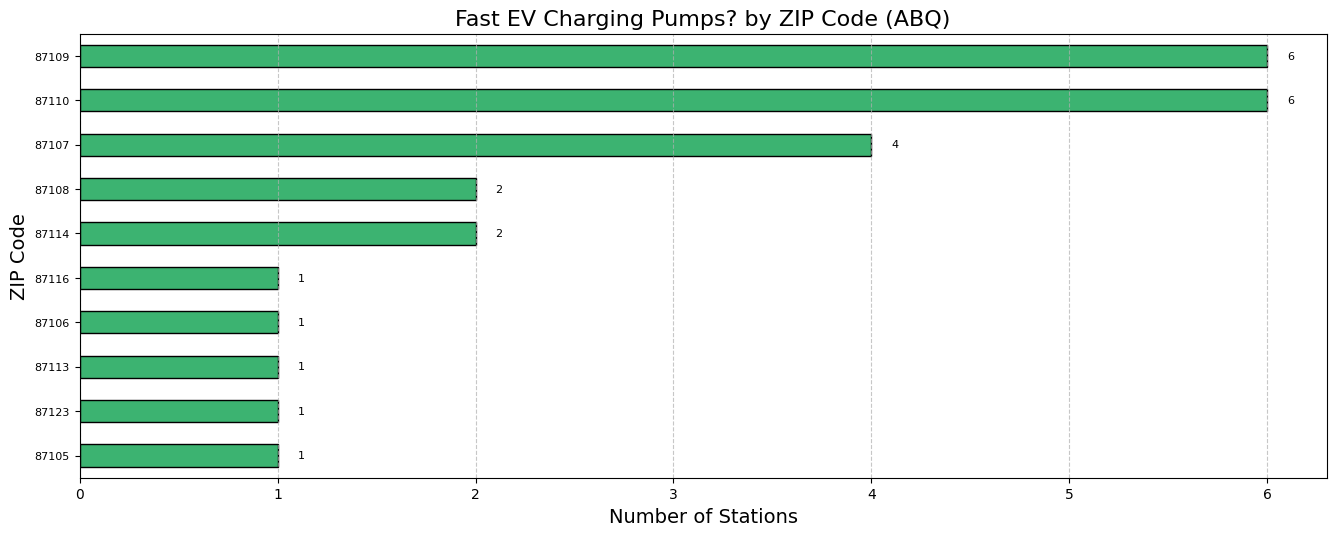

In [22]:
import matplotlib.pyplot as plt

zip_counts = ev_zip_ABQ['ZIP'].value_counts()

plt.figure(figsize=(14, max(6, len(zip_counts) * 0.15)))  # Height scales with number of ZIPs
ax = zip_counts.plot(kind='barh', color='mediumseagreen', edgecolor='black')

plt.title('Fast EV Charging Pumps? by ZIP Code (ABQ)', fontsize=16)
plt.xlabel('Number of Stations', fontsize=14)
plt.ylabel('ZIP Code', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)  # Smaller font if many ZIPs
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3)
plt.gca().invert_yaxis()  # Largest on top

# Add station count labels on bars
for i, v in enumerate(zip_counts):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=8)

In [23]:
ev_zip_ABQ['Open Year'].value_counts().sort_index(ascending=True)

,count
Open Year,
2015.0,1
2019.0,1
2020.0,1
2021.0,1
2022.0,1
2023.0,3
2024.0,11
2025.0,6


In [24]:
zip_year_counts = ev_zip_ABQ.groupby(['ZIP', 'Open Year']).size().reset_index(name='Total Stations')

In [25]:
zip_year_pivot = zip_year_counts.pivot(index='Open Year', columns='ZIP', values='Total Stations').fillna(0)

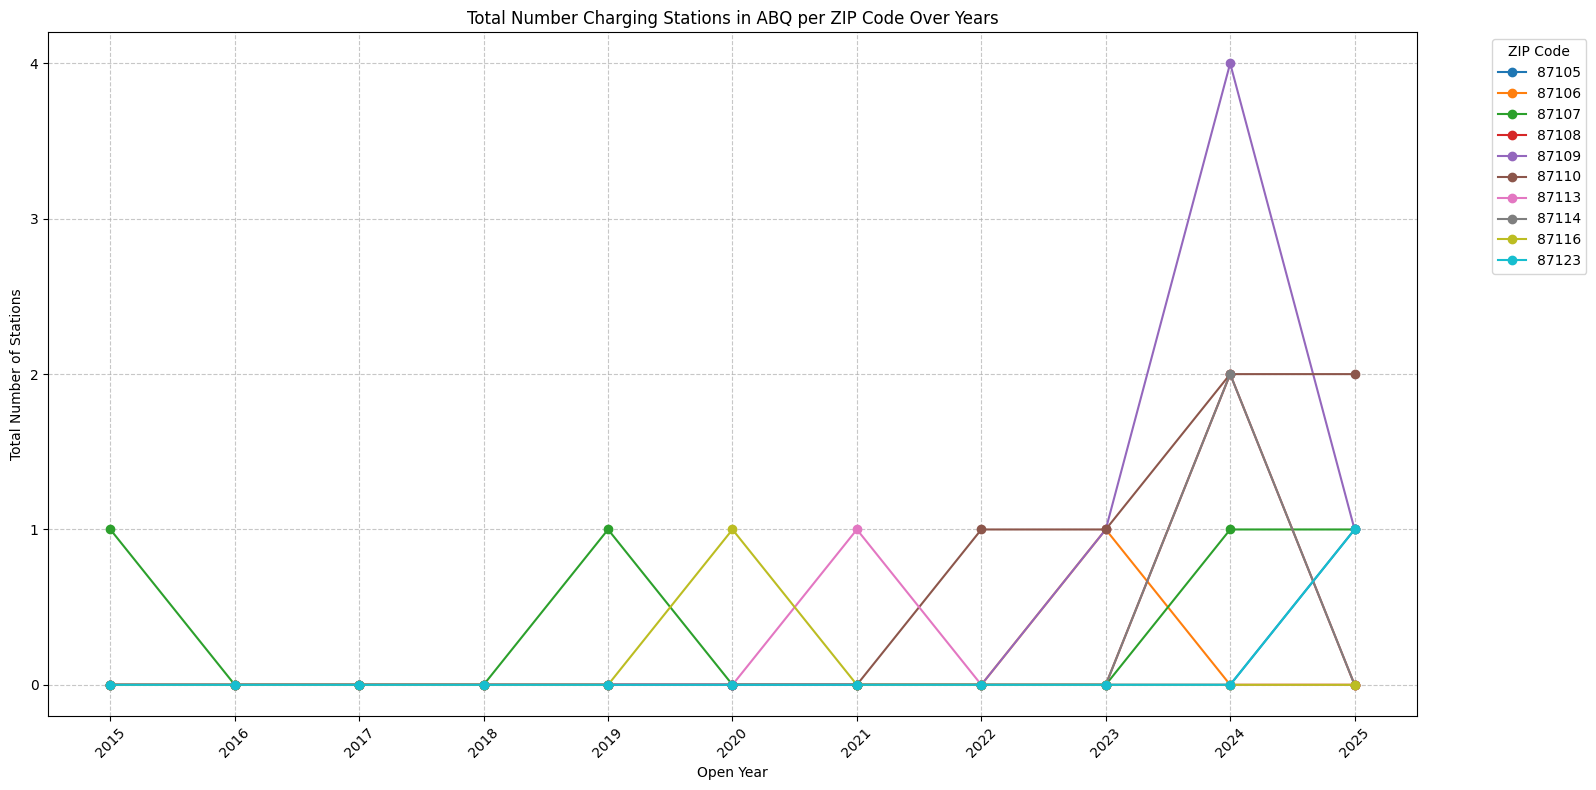

In [26]:
# Create full year range from 2015 to 2025
all_years = np.arange(2015, 2026)  # 2026 is exclusive, so this gives 2012–2025

# Reindex pivot_df to include all years (fill missing with 0)
zip_year_pivot = zip_year_pivot.reindex(all_years, fill_value=0)

zip_year_pivot.plot(figsize=(16, 8), marker='o')

plt.title('Total Number Charging Stations in ABQ per ZIP Code Over Years')
plt.xlabel('Open Year')
plt.ylabel('Total Number of Stations')

# Show every integer on y-axis
plt.yticks(np.arange(0, int(zip_year_pivot.values.max()) + 1, 1))

# Show every year on x-axis
plt.xticks(all_years, rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Legend and layout
plt.legend(title='ZIP Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


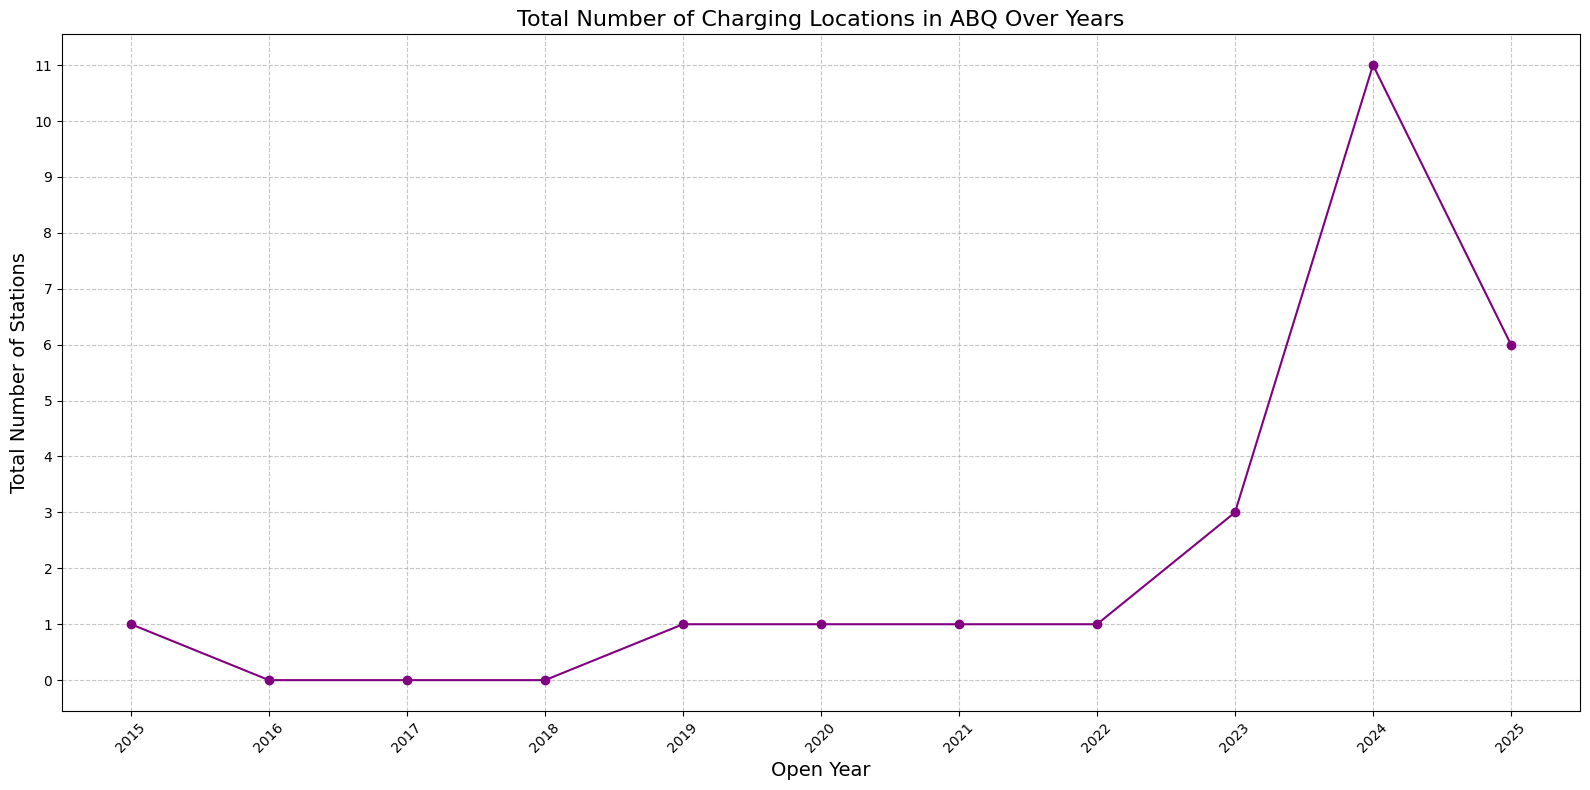

In [27]:
# Calculate the total number of stations for each year by summing across columns
total_stations_per_year = zip_year_pivot.sum(axis=1)

# Plot the total number of stations per year
plt.figure(figsize=(16, 8))
total_stations_per_year.plot(kind='line', marker='o', color='purple')

plt.title('Total Number of Charging Locations in ABQ Over Years', fontsize=16)
plt.xlabel('Open Year', fontsize=14)
plt.ylabel('Total Number of Stations', fontsize=14)

# Show every integer on y-axis, up to the maximum value
plt.yticks(np.arange(0, int(total_stations_per_year.max()) + 1, 1))

# Show every year on x-axis
plt.xticks(total_stations_per_year.index, rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [28]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from branca.colormap import linear

# A list of Albuquerque ZIP codes.
abq_zip_codes = [
    87101, 87102, 87103, 87104, 87105, 87106, 87107, 87108, 87109,
    87110, 87111, 87112, 87113, 87114, 87116, 87119, 87120, 87121,
    87122, 87123, 87124, 87125, 87131, 87144, 87151, 87153, 87154,
    87158, 87176, 87181, 87184, 87185, 87187, 87190, 87191, 87192,
    87193, 87194, 87195, 87196, 87197, 87198, 87199
]

# Ensure ZIP column is integer type
ev_zip_ABQ.loc[:, 'ZIP'] = pd.to_numeric(ev_zip_ABQ['ZIP'], errors='coerce').astype('Int64')
df_stations_abq = ev_zip_ABQ[ev_zip_ABQ['ZIP'].isin(abq_zip_codes)].copy()

if df_stations_abq.empty:
    print("\nError: The filtered DataFrame is empty. Please check your data and the list of ZIP codes.")
else:
    print(f"Found {len(df_stations_abq)} total charging ports in the specified Albuquerque ZIP codes.")

    # Sum the existing 'EV DC Fast Count' column for each ZIP code
    fast_chargers_per_zip = df_stations_abq.groupby('ZIP')['EV DC Fast Count'].sum().sort_index()

    print("\nNumber of DC Fast Charger Ports per ZIP code:")
    print(fast_chargers_per_zip)

    # Create a GeoDataFrame from the station data.
    geometry = [Point(xy) for xy in zip(df_stations_abq['Longitude'], df_stations_abq['Latitude'])]
    gdf_stations_abq = gpd.GeoDataFrame(df_stations_abq, geometry=geometry, crs='EPSG:4326')

    # The 'linear.plasma' is a predefined colormap object. We scale it directly.
    zip_code_range = list(gdf_stations_abq['ZIP'].unique())
    zip_code_range.sort()

    zip_colormap = linear.plasma.scale(vmin=min(zip_code_range), vmax=max(zip_code_range))

    m = folium.Map(location=[35.0844, -106.6504], zoom_start=11)

    for idx, row in gdf_stations_abq.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color=zip_colormap(row['ZIP']),
            fill=True,
            fill_color=zip_colormap(row['ZIP']),
            fill_opacity=0.7,
            tooltip=f"ZIP: {row['ZIP']}<br>"
                    f"Open Year: {row['Open Year']}<br>"
                    f"DC Fast Charger Ports: {row['EV DC Fast Count']}"
        ).add_to(m)

    m.save('albuquerque_charging_by_zip.html')
    print("\nMap saved to albuquerque_charging_by_zip.html. Open this file in your web browser to view it.")

Found 25 total charging ports in the specified Albuquerque ZIP codes.

Number of DC Fast Charger Ports per ZIP code:
ZIP
87105     4.0
87106     6.0
87107    24.0
87108    10.0
87109    14.0
87110    34.0
87113     1.0
87114     2.0
87116     5.0
87123     2.0
Name: EV DC Fast Count, dtype: float64

Map saved to albuquerque_charging_by_zip.html. Open this file in your web browser to view it.


In [35]:
ev_zip_ABQ.to_csv('ev_zip_ABQ.csv', index=False)

Did an ARIMA model just to see what would happen.

Transformed Time Series Data:
           New Stations  New DC Fast Chargers
Open Year                                    
2015                  1                   6.0
2016                  0                   0.0
2017                  0                   0.0
2018                  0                   0.0
2019                  1                  10.0
2020                  1                   5.0
2021                  1                   1.0
2022                  1                  16.0
2023                  3                  16.0
2024                 11                  24.0
2025                  6                  24.0

--- Stationarity Check (Augmented Dickey-Fuller Test) ---

Results for 'New Stations' time series:
ADF Statistic: -1.2825621760256458
p-value: 0.6371119025679873
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487

Results for 'New DC Fast Chargers' time series:
ADF Statistic: 1.3117738384594488
p-value: 0.9966740516460054
Critical Values:
	1%: -4.9386902332361

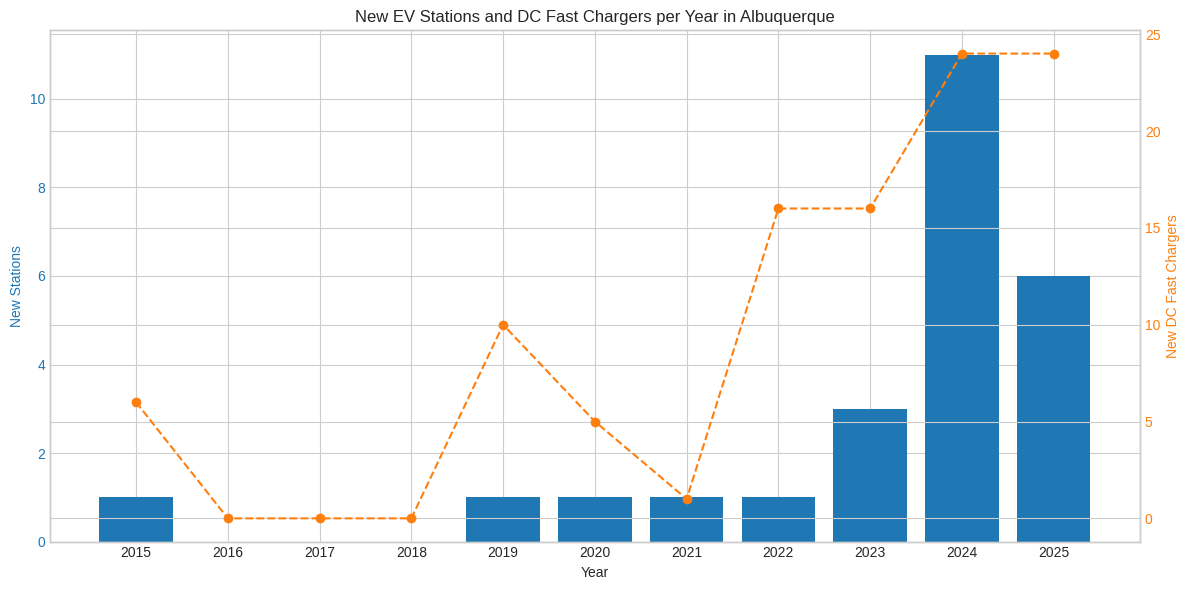

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
try:
    df = pd.read_csv('ev_zip_ABQ.csv')
except FileNotFoundError:
    print("The file 'ev_zip_ABQ.csv' was not found.")
    # As a fallback for demonstration, create a dummy dataframe if the file is not found.
    data = {'Open Year': [2015, 2019, 2020, 2021, 2022, 2023, 2023, 2018, 2022],
            'EV DC Fast Count': [6.0, 10.0, 5.0, 1.0, 16.0, 2.0, 8.0, 4.0, 12.0]}
    df = pd.DataFrame(data)


# --- Step 1: Data Preprocessing and Aggregation ---

# The 'Open Year' column is the time component. Let's inspect it.
# Drop rows where 'Open Year' is NaN
df.dropna(subset=['Open Year'], inplace=True)

# Convert 'Open Year' to integer
df['Open Year'] = df['Open Year'].astype(int)

# To use an ARIMA model, we need to aggregate the data into a time series.
# Let's create a time series of the number of new charging stations opened each year.
stations_per_year = df.groupby('Open Year').size().reset_index(name='New Stations')
stations_per_year = stations_per_year.sort_values('Open Year')
stations_per_year.set_index('Open Year', inplace=True)

# Let's also create a time series for the number of new DC fast chargers installed each year.
# Ensure 'EV DC Fast Count' is numeric, coercing errors to NaN and then filling with 0
df['EV DC Fast Count'] = pd.to_numeric(df['EV DC Fast Count'], errors='coerce').fillna(0)
chargers_per_year = df.groupby('Open Year')['EV DC Fast Count'].sum().reset_index()
chargers_per_year = chargers_per_year.sort_values('Open Year')
chargers_per_year.set_index('Open Year', inplace=True)


# --- Step 2: Analyze the Time Series ---

# It's important to have a continuous time index. Let's reindex to fill in missing years.
# For 'New Stations'
all_years_stations = pd.Index(range(stations_per_year.index.min(), stations_per_year.index.max() + 1), name='Open Year')
stations_per_year = stations_per_year.reindex(all_years_stations, fill_value=0)

# For 'New DC Fast Chargers'
all_years_chargers = pd.Index(range(chargers_per_year.index.min(), chargers_per_year.index.max() + 1), name='Open Year')
chargers_per_year = chargers_per_year.reindex(all_years_chargers, fill_value=0)

# Combine into one dataframe for easy viewing
time_series_df = pd.concat([stations_per_year, chargers_per_year], axis=1)
time_series_df.columns = ['New Stations', 'New DC Fast Chargers']

print("Transformed Time Series Data:")
print(time_series_df)

# Plot the time series
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('New Stations', color='C0')
ax1.bar(time_series_df.index, time_series_df['New Stations'], color='C0', label='New Stations')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.set_xticks(time_series_df.index)

ax2 = ax1.twinx()
ax2.set_ylabel('New DC Fast Chargers', color='C1')
ax2.plot(time_series_df.index, time_series_df['New DC Fast Chargers'], color='C1', marker='o', linestyle='--', label='New DC Fast Chargers')
ax2.tick_params(axis='y', labelcolor='C1')


plt.title('New EV Stations and DC Fast Chargers per Year in Albuquerque')
fig.tight_layout()
plt.savefig('ev_stations_time_series.png')


# --- Step 3: Stationarity Check for ARIMA ---
# An ARIMA model requires the time series to be stationary.
# Let's check the 'New Stations' series for stationarity using the Augmented Dickey-Fuller (ADF) test.

print("\n--- Stationarity Check (Augmented Dickey-Fuller Test) ---")

# ADF Test on 'New Stations'
adf_result_stations = adfuller(time_series_df['New Stations'])
print(f"\nResults for 'New Stations' time series:")
print(f'ADF Statistic: {adf_result_stations[0]}')
print(f'p-value: {adf_result_stations[1]}')
print('Critical Values:')
for key, value in adfuller(time_series_df['New Stations'])[4].items():
    print(f'\t{key}: {value}')

# ADF Test on 'New DC Fast Chargers'
adf_result_chargers = adfuller(time_series_df['New DC Fast Chargers'])
print(f"\nResults for 'New DC Fast Chargers' time series:")
print(f'ADF Statistic: {adf_result_chargers[0]}')
print(f'p-value: {adf_result_chargers[1]}')
print('Critical Values:')
for key, value in adfuller(time_series_df['New DC Fast Chargers'])[4].items():
    print(f'\t{key}: {value}')

# Export the transformed data to a CSV file
time_series_df.to_csv('ev_time_series_data.csv')

## Exploratory Data Analysis


## Processing



## Data Visualization/Communication of Results
